# Welcome word.

> <i> Hi! Thank you for the correction/ review! </i> 
<br>
My name is Tauras Aleksandravicius and this is a project about Coursera Courses!

# Introduction.

> For this project, I have a dataset of Coursera Courses. This consists of 6 columns and 891 course data. This dataset is found in Kaggle: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset


My main goal and expectation at this learning stage are to utilize my own judgment in performing the analysis and selecting the most important avenues of exploration. <b> In order to accomplish this </b>, I will assume the role of a <i>COURSERA</i> Data Analyst and strive to provide valuable reports for various decision makers.

# Project mission.
<br>
<br>
<b><center> Perform data preprocessing, analysis and visualization techniques in order to accomplish all project objectives and demonstrate knowledge in Matplotlib/ Seaborn libraries while using Pandas and Numpy.

# Project objectives.

<br>
To execute project mission these project objectives/ goals are raised:

* 1. Perform exploratory data analysis.

* 2. Perform keyword analysis: <b> To Marketing (especially SEO) team.</b>
> What keywords are prevailing in course titles?
<br> What keywords give the best mean course enrollment numbers?
<br> What keywords give the best mean course rating numbers?
<br> Does more characters in course title affect course enrollment numbers?

* 3. Productivity analysis: <b> To Product managers.</b>
> What are the best/ worst courses by course rating and enrollment numbers? How actually bad they are in terms of median numbers?
<br> What are the worst course certificates by course rating and enrollment numbers? How actually bad they are in terms of median numbers?
<br> What study difficulties are the most popular/ best ranked?

* 4. Partnership analysis: <b> To Partnerships department.</b>
> What 3 organizations (that has at least 10 courses) provide best results in terms of mean ratings, mean enrollment?
<br>  What are Top 10 organizations offering courses on Coursera platform, by courses offered?

* 5. Education analysis: <b> To Head of Education (Content Development Team)</b>
> What percentage of our courses are of which difficulty?
<br>  What percentage of our courses are of which certificate type?
<br>  What is the mean enrollment/ ratings of 3 different certificates?
<br>  What is the mean enrollment/ ratings of 3 different difficulties?


* 6. Use as many different plots (suitable to task) as possible.

# Technical requirements.

To accomplish defined objectives and scope of the project these requirements will be implemented:
> <b>1.</b> Code must adhere to the PEP8 requirements, be readable and well commented.<br>
> <b>2.</b> Actions must adhere to the project objectives.<br>
> <b>3.</b> Pandas/ Matplotlib/ Seaborn libraries mainly have to be used. While I am aware of DataFrame EDA packages like Pandas Profilling and Sweetviz at this stage of learning I think that everything has to be <i>'hard-coded'.</i><br>
 > <b>4.</b> For Correlation analysis, Pearson's correlation coefficient will be employed. Pearson's correlation coefficient is a measure of the linear relationship between two variables. It takes values between -1 and 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.

# Standards and Assumptions.

<b> 1. </b> I assume that some of the features will be of a textual data nature and somehow structured (at least space separated), so analysis techniques will still be applicable.<br>
<b> 2. </b> When Courses are compared in-between considering quantitative data preference on the importance of feature will be given subjectively (i. e. first filtering by selected course rating criteria and then sorting by enrolled students).<br>
<b> 3. </b> My standard for keyword analysis is that a word contains at least 4 characters. I really want to avoid picking words like <i> and </i>, but have words like <i> data.<br></i>
<b> 4. </b> If there is possibility to plot dependancies of at least 3 features on certain feature I will create function for plotting. <br>
<b> 5. </b> If performing Machine Learning modelling, textual data (Course Title, Course organization) would be thorougly investigated by checking for data completeness, data consistency, data accuracy and standartization. However this is not performed at this stage of learning because no sophisticated feature engineering will be needed. 

# Biases.

> <b> 1. </b> All of the outliers will be kept inplace because we do not conduct any predictive modelling. </b><br>
<b> 2. </b> Many other means to dive into data could have been employed but the ones selected were solely by the personal preference. <br>
<b> 3. </b> While conducting the project one obvious bias has been noticed, that it will be impossible to compare categorical features in absolute numbers because of very different distributions (i. e. there are 3 times more one certificate type courses than other and etc. <br>

# Domain knowledge.

> I do not have any personal experience in Educational Technologies besides my studies in TC and a couple of courses in Coursera. The rankings and enrollment numbers make no general sense to me and I think I could not conclude what ranks and enrollment rates are considered normal.

# Exploratory Data analysis.

In this part EDA will be conducted in the further manner:
> 1. Dataset Overview and Descriptive Statistics;
> 2. Data Quality Evaluation and visualization (Univariate and Multivariate).

## Dataset Overview and Descriptive Statistics.

> * Data will be loaded from a .csv file into a Pandas DataFrame.
> * Libraries for further analysis will be imported and aliases created.
> * Also I will print first line of DataFrame, to be sure that DataFrame object has been created and all columns have right names.
> * Use Pandas built-in functions to find out main aspects of the dataset.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import warnings

# Set warnings to ignore
warnings.filterwarnings("ignore")

# Setting palette for plots
sns.set_palette("dark")

# Define path to .csv file
path = pathlib.Path(
    r"./coursea_data.csv")

# Read csv file into a Pandas DataFrame
df = pd.read_csv(path, index_col=0)

# Print first rows of the DataFrame
df.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Initially it seems that out of 6 given feature colums, two <b> (course_rating and course_students_enrolled)</b> contain numeric data and other are categorical (text) data.

In [2]:
# Number of observations and features
df.shape

(891, 6)

In [3]:
# Data types
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

It seems that the feature which describes how many students are enrolled into the course is an <b> object type. <br> </b> To perform desired data analysis it's mandatory to fix this issue as soon as possible.
For this purpose I create a new column transforming course_students_enrolled feature into numerical one.

In [4]:
# Create a new column 'new_students_enrolled' for numerical transformation
df['new_students_enrolled'] = np.where(df['course_students_enrolled'].str.contains('\.'), df['course_students_enrolled'].str.replace('k', '00').str.replace('.', ''), df['course_students_enrolled'].str.replace('k', '000', regex=True))

# Replace 'm' with '00000' in 'new_students_enrolled' column
df['new_students_enrolled'] = df['new_students_enrolled'].str.replace('m', '00000')

# Convert 'new_students_enrolled' column to integer data type
df['new_students_enrolled'] = df.new_students_enrolled.astype(int)

# Sort the df by 'new_students_enrolled' column in descending order
df.sort_values(by=['new_students_enrolled'], ascending=False).head(2)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,new_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,3200000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000


Now I have 7 columns. While 2 of 7 have the same information, I decided to keep the original column because dataset is not very large and I can use that format for better visualisations.

In [5]:
# Now I can check the duplicated rows.
df[df.duplicated()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,new_students_enrolled


In [6]:
# Missing values per feature.
df.isna().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
new_students_enrolled       0
dtype: int64

Now it's time to check for descriptive statistics.

In [7]:
# This outputs dataframe numerical feature description
df.describe()

,course_rating,new_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [8]:
# This outputs information about categorical features
df.describe(include='object')

,course_title,course_organization,course_Certificate_type,course_difficulty,course_students_enrolled
count,891,891,891,891,891
unique,888,154,3,4,205
top,Developing Your Musicianship,University of Pennsylvania,COURSE,Beginner,120k
freq,2,59,582,487,22


In [9]:
df.nunique()

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
new_students_enrolled       205
dtype: int64

<b><center> Conclusion:
1. Our dataset has 6 features (4 object type and 2 integer type).
2. There are no duplicated rows, null values or missing values in the dataset.
3. Some of the features (Course organization, Certificate type, Difficulty, Enrollment) represent categorical data and their relationships could be further explored via EDA techniques.
4. Course title is exclusively qualitative textual data that can mainly be explored using natural language processing techniques. However some other features of this variable will be explored for analysis.
5. While course ratings range from 3.3 to 5.0, course enrollment varies between 1.5 k to 3.2 million. Course enrollment rates might be difficult to handle (especially 4th quartile, which is >100 000 students.
5. From the current perspective it can be concluded that dataset is suitable for creating machine learning models (classification tasks) after encoding categorical features. However real world application does not seem to create big business value.

## Data Quality Evaluation.
<b> Since we have checked for duplicate rows and missing values it's time to explore features by investigating their relationships and distributions.<br></b>

In [10]:
df.nunique()

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
new_students_enrolled       205
dtype: int64

In [11]:
df.head(1)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,new_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300


Based on value counts further actions will be taken:
* <b> Course Titles</b> - Data Quality <b> will not be analyzed.
* <b>Course organization</b> - Frequency tables will be analyzed.
* <b>Course certificate type</b> - Frequency tables will be analyzed.
* <b>Course difficulty</b> - Frequency tables will be analyzed.
* <b>Course rating</b> - Boxplots, distribution and correlation with enrolled students analyzed.
* <b>Students enrollment</b> - Boxplots, distribution and correlation with enrolled students analyzed.

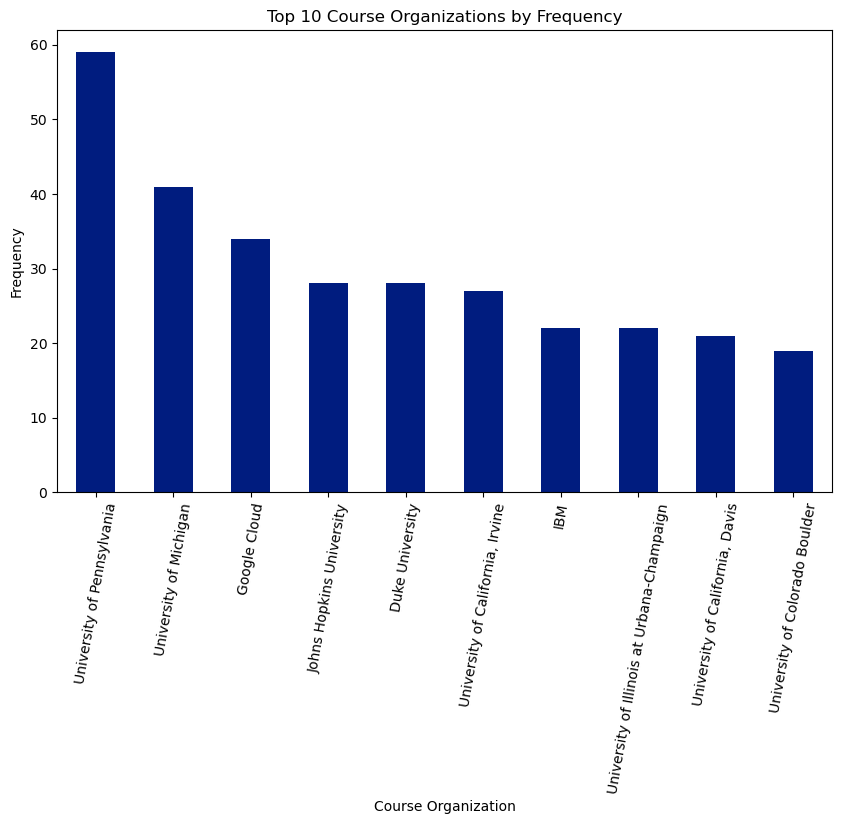

In [12]:
# Calculate the frequency counts of each course organization
organization_counts = df['course_organization'].value_counts().head(10)

# Create a bar plot for the top 10 course organizations
plt.figure(figsize=(10, 6))
organization_counts.plot(kind='bar')
plt.title('Top 10 Course Organizations by Frequency')
plt.xlabel('Course Organization')
plt.ylabel('Frequency')

# Rotate x-axis labels if needed
plt.xticks(rotation=80)

# Display the plot
plt.show()


<b> Conclusion </b>: The organizations with the most courses in Coursera are: University of Pennsylvania, University of Michigan, Google Cloud.

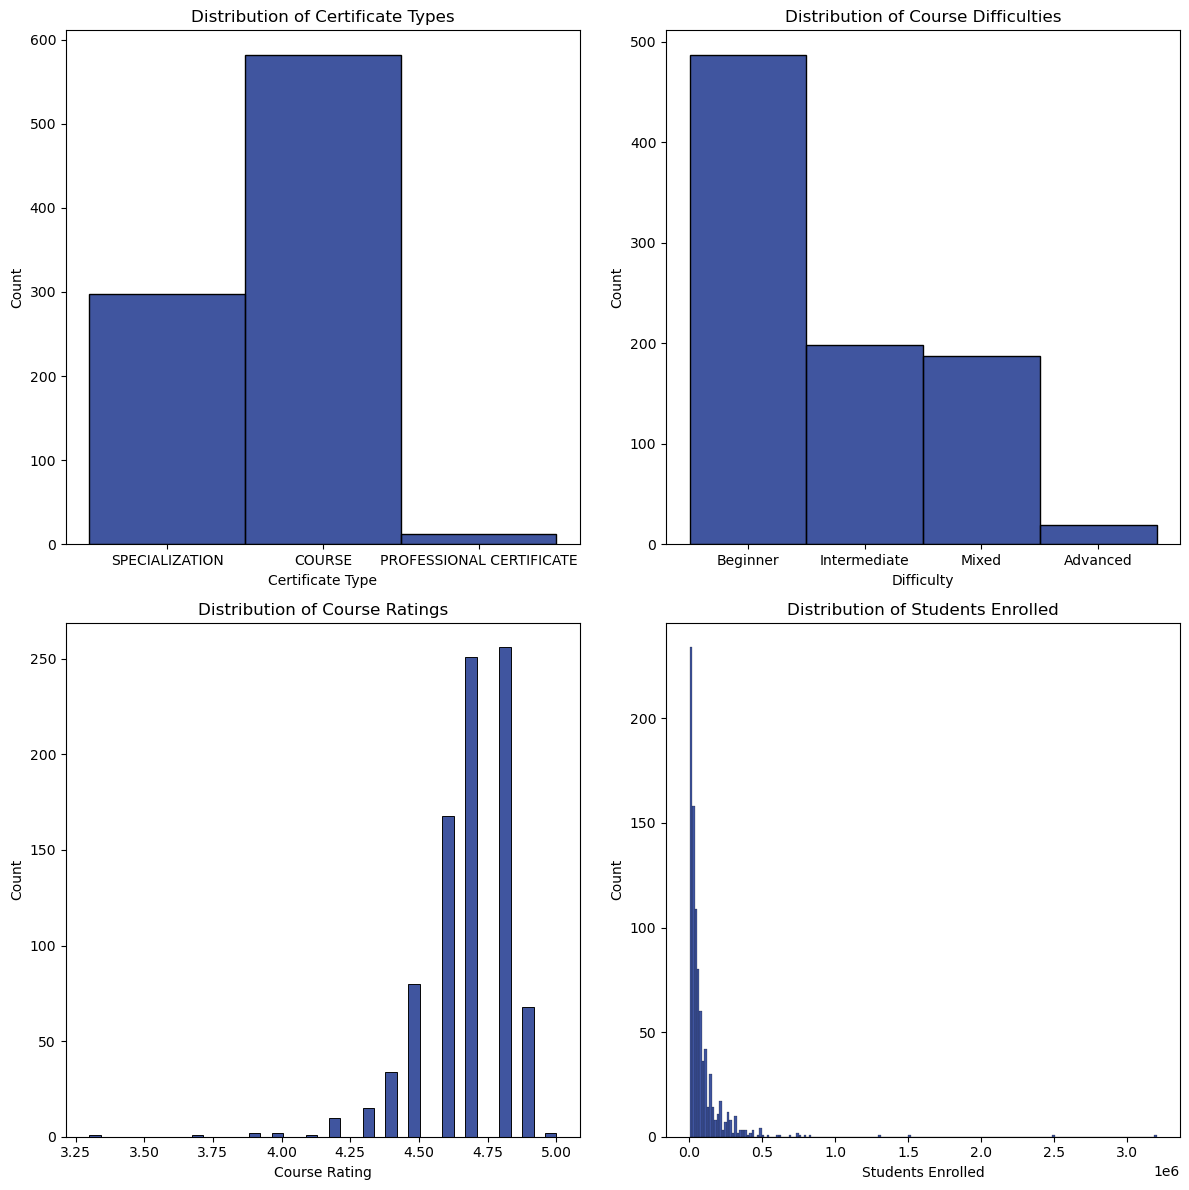

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.flatten()

sns.histplot(data=df['course_Certificate_type'], ax=ax1)
ax1.set_xlabel('Certificate Type')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Certificate Types')

sns.histplot(data=df['course_difficulty'], ax=ax2)
ax2.set_xlabel('Difficulty')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Course Difficulties')

sns.histplot(data=df['course_rating'], ax=ax3)
ax3.set_xlabel('Course Rating')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Course Ratings')

sns.histplot(data=df['new_students_enrolled'], ax=ax4)
ax4.set_xlabel('Students Enrolled')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of Students Enrolled')

plt.tight_layout()
plt.show()


<b> Conclusion </b>: 
1. It can be concluded that Begginer level courses with a certificate type of 'course' are dominating in the platform.
2. It can be concluded that majority of ratings fall between 4.6 and 4.8 (as previously indicated in the QRT info). Information also suggest that overall course quality is very good.
3. There is high variability in the student enrollment numbers and the vast majority (75%) fall below 100 k students.

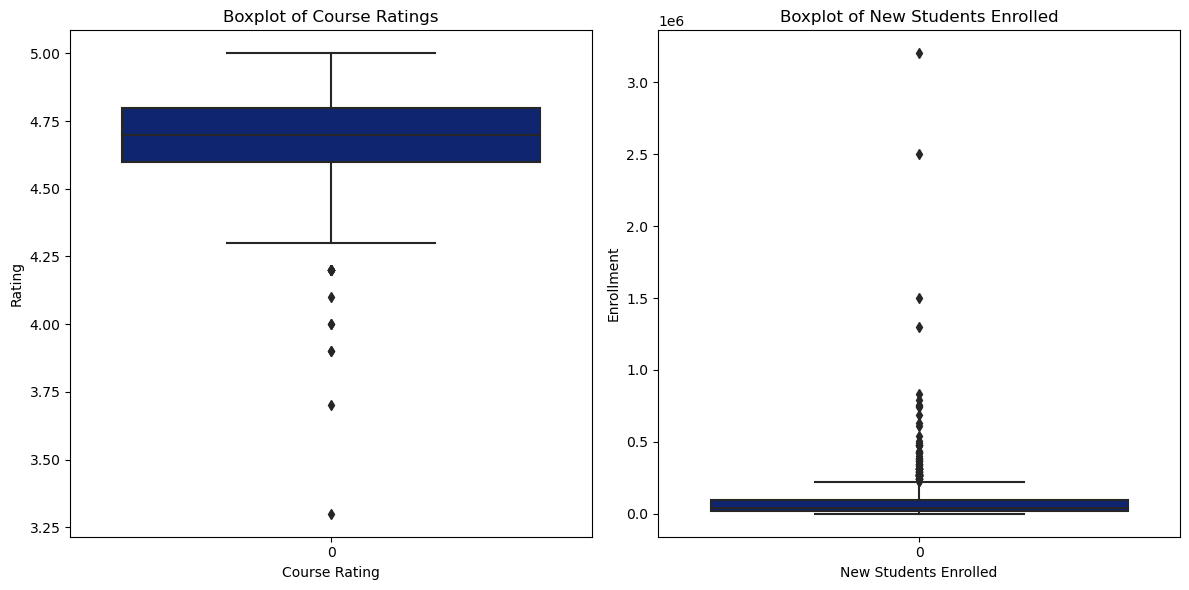

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axes.flatten()

# Boxplot for 'course_rating'
sns.boxplot(data=df['course_rating'], ax=ax1)
ax1.set_xlabel('Course Rating')
ax1.set_ylabel('Rating')
ax1.set_title('Boxplot of Course Ratings')

# Boxplot for 'new_students_enrolled'
sns.boxplot(data=df['new_students_enrolled'], ax=ax2)
ax2.set_xlabel('New Students Enrolled')
ax2.set_ylabel('Enrollment')
ax2.set_title('Boxplot of New Students Enrolled')

plt.tight_layout()
plt.show()

<b> What are the outliers? <br> </b>
An outlier is an observation or data point that significantly deviates from the other observations in a dataset. It is a value that is unusually high or low compared to the majority of the data points. Outliers can arise due to various reasons such as measurement errors, data entry errors, or genuinely extreme values

<b> Conclusion </b>: 
Boxplots indicate that courses that have rating below 4.3 and enrollment higher than 222 500 are considered as outliers. However, since predictive modelling is not going to be conducted, outliers will be kept. <b> Also it can be concluded that none of the features values are in normal distribution.

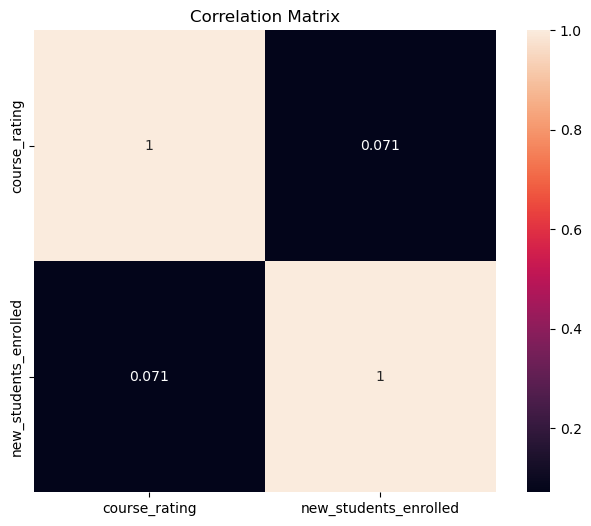

In [15]:
# Calculate the correlation matrix
correlation_matrix = df[['course_rating', 'new_students_enrolled']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, square=True)

# Set plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

<b><center> Conclusion:
1. There is no significant linear correlation between numerical features (course rating and students enrolled).

# Further analysis.
In this part main analysis of the dataset will be conducted. Valuable insights will be handed over to decision makers.

## Keyword analysis.
This part is designated directly to Marketing Team (especially SEO).
Findings will be presented in the visualized format and conclusions given.

<center> 1. What keywords are prevailing in course titles?

In [16]:
# Step 1: Extract the course titles
course_titles = df['course_title'].tolist()

# Step 2: Count the frequency of each word (excluding words shorter than 4 characters)
word_counts = {}
for title in course_titles:
    words = title.split()
    for word in words:
        if len(word) >= 4:  # Exclude words shorter than 4 characters
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

# Step 3: Convert counts and tokens into a DataFrame
df_keywords = pd.DataFrame({'Keyword': list(word_counts.keys()), 'Count': list(word_counts.values())})

# Step 4: Sort the DataFrame by count in descending order
df_keywords = df_keywords.sort_values(by='Count', ascending=False)

# Step 5: Get the top keywords
top_keywords = df_keywords.head(10)['Keyword'].tolist()  # Change '10' to the desired number of top keywords

print(top_keywords)


['Introduction', 'Data', 'with', 'Management', 'Science', 'Business', 'Python', 'Learning', 'Health', 'Google']


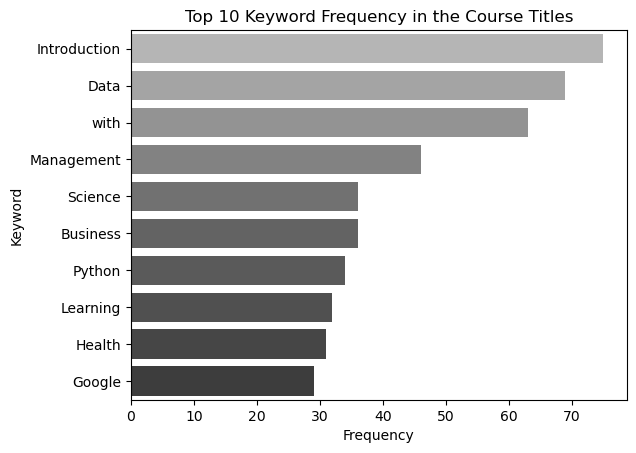

In [17]:
# Sort the DataFrame by count in descending order
df_sorted = df_keywords.head(10).sort_values(by='Count', ascending=False)

# Set a custom color palette
# colors = sns.color_palette("gray", len(df_sorted))

# Create the barplot using seaborn
ax = sns.barplot(x='Count', y='Keyword', data=df_sorted, palette='Greys_d')

# Set labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Keyword')
ax.set_title('Top 10 Keyword Frequency in the Course Titles')

# Display the plot
plt.show()

<b>Conclusion</b>: <br> 1. Marketing (especially SEO) teams might focus on promotion and creating content around courses that have any of TOP 10 keywords. Optimization of meta descriptions and page titles is also highly advised. <br> 2. It is evident that we must maintain our focus on Introductory courses related to Data, Management, Business, Python programming.<br>

<center> 2. What keywords give the best mean course enrollment numbers?

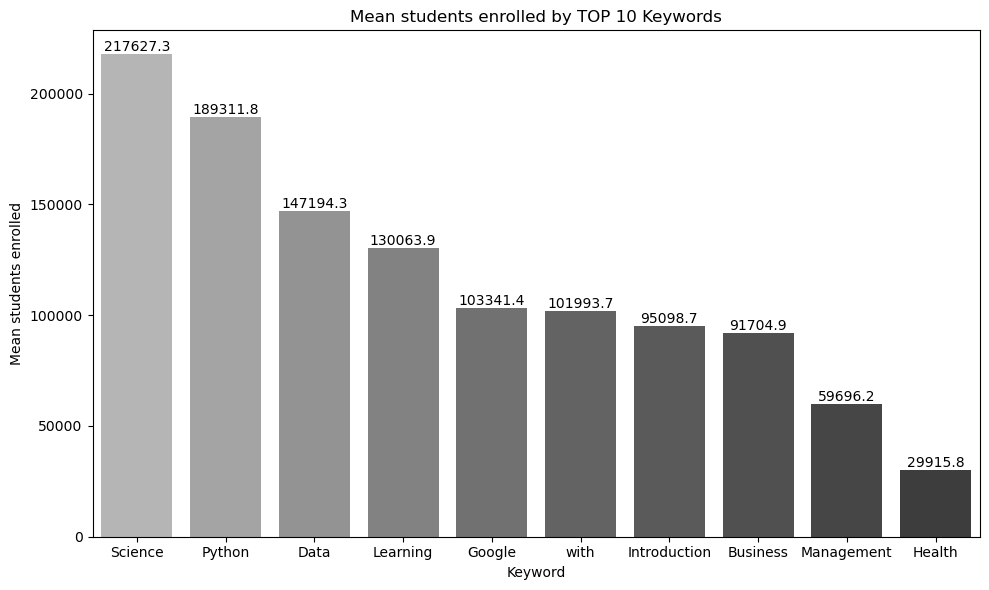

In [18]:
# Create an empty dictionary to store the mean 'new_students_enrolled' for each keyword
mean_enrolled = {}

# Iterate over the course titles
for title in df['course_title']:
    # Check the occurrences of top keywords in each title
    for keyword in top_keywords:
        if keyword in title:
            # Get the corresponding 'new_students_enrolled' value
            enrolled = df.loc[df['course_title'] == title, 'new_students_enrolled'].values
            if enrolled.size > 0:
                enrolled = enrolled[0]
                # Update the mean 'new_students_enrolled' value for the keyword
                if keyword in mean_enrolled:
                    mean_enrolled[keyword].append(enrolled)
                else:
                    mean_enrolled[keyword] = [enrolled]

# Calculate the mean 'new_students_enrolled' for each keyword
for keyword, enrolled_list in mean_enrolled.items():
    mean_enrolled[keyword] = sum(enrolled_list) / len(enrolled_list)

# Convert mean_enrolled dictionary to a DataFrame
mean_enrolled_df = pd.DataFrame({'Keyword': list(mean_enrolled.keys()), 'Mean_Enrolled': list(mean_enrolled.values())})

# Sort the DataFrame by mean 'new_students_enrolled' in descending order
mean_enrolled_df = mean_enrolled_df.sort_values(by='Mean_Enrolled', ascending=False)

# Plot the mean 'new_students_enrolled' values using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_enrolled_df, x='Keyword', y='Mean_Enrolled', palette='Greys_d')
plt.xlabel('Keyword')
plt.ylabel('Mean students enrolled')
plt.title('Mean students enrolled by TOP 10 Keywords')

# Add value labels above the bars
for index, row in enumerate(mean_enrolled_df['Mean_Enrolled']):
    plt.text(index, row, f"{round(row, 1)}", ha='center', va='bottom')

plt.tight_layout()

# Display the plot
plt.show()

<b>Conclusion</b>: <br> Course titles that have words "Science, Python, Data" have the highest enrollment rates out of all words in the titles (min. 4 symbols). Courses with these names are the most important for our marketing campaigns, because they are the most looked after.

<center>3. What keywords give the best mean course rating numbers?

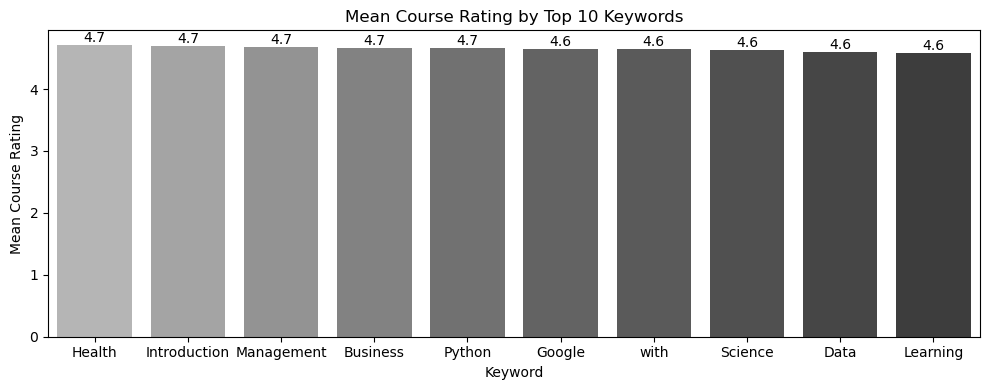

In [19]:
# Create an empty dictionary to store the mean 'course_rating' for each keyword
mean_rating = {}

# Iterate over the course titles
for title in df['course_title']:
    # Check the occurrences of top keywords in each title
    for keyword in top_keywords:
        if keyword in title:
            # Get the corresponding 'course_rating' value
            rating = df.loc[df['course_title'] == title, 'course_rating'].values
            if rating.size > 0:
                rating = rating[0]
                # Update the mean 'course_rating' value for the keyword
                if keyword in mean_rating:
                    mean_rating[keyword].append(rating)
                else:
                    mean_rating[keyword] = [rating]

# Calculate the mean 'course_rating' for each keyword
for keyword, rating_list in mean_rating.items():
    mean_rating[keyword] = sum(rating_list) / len(rating_list)

# Convert mean_rating dictionary to a DataFrame
mean_rating_df = pd.DataFrame({'Keyword': list(mean_rating.keys()), 'Mean_Rating': list(mean_rating.values())})

# Sort the DataFrame by mean 'course_rating' in descending order
mean_rating_df = mean_rating_df.sort_values(by='Mean_Rating', ascending=False)

# Plot the mean 'course_rating' values using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(data=mean_rating_df, x='Keyword', y='Mean_Rating', palette='Greys_d')
plt.xlabel('Keyword')
plt.ylabel('Mean Course Rating')
plt.title('Mean Course Rating by Top 10 Keywords')

# Add value labels above the bars
for index, row in enumerate(mean_rating_df['Mean_Rating']):
    plt.text(index, row, f"{round(row, 1)}", ha='center', va='bottom')

plt.tight_layout()

# Display the plot
plt.show()


<b>Conclusion</b>: There is no significant relationship or improvement between Top 10 keywords and course ratings. However 2 % improvement is at the courses that include keywords like Health, Introduction, Management, Business, Python.

<center> 4. Does more characters in course title affect course enrollment numbers?

In [20]:
# Calculate the correlation
df['title_length'] = df['course_title'].apply(lambda x: len(x))
correlation = df['title_length'].corr(df['new_students_enrolled'])

# Display the correlation
print("Correlation between Title Length and Students Enrolled:", correlation)


Correlation between Title Length and Students Enrolled: -0.1216235292365334


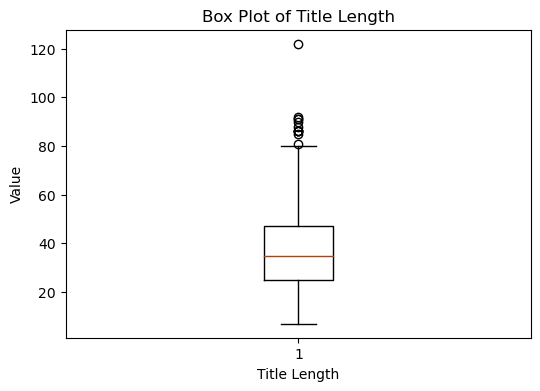

In [21]:
# Create a box plot of title length
plt.figure(figsize=(6, 4))
plt.boxplot(df['title_length'])
plt.xlabel('Title Length')
plt.ylabel('Value')
plt.title('Box Plot of Title Length')
plt.show()

To find out about relationship between title length and course enrollmenet rates I decided to drop the outliers from both features. <br> After check at student enrollment rates and title length I decided to remove lines with over <b> 222 500 students </b> (upper whisker of the boxplot) and over  <b> 80 characters  </b> (also upper whisker) in the title length. <br>
Furthermore ranges for character will be implemented based on the median (35), 1st QT - 25, 4th QT - 47 characters.

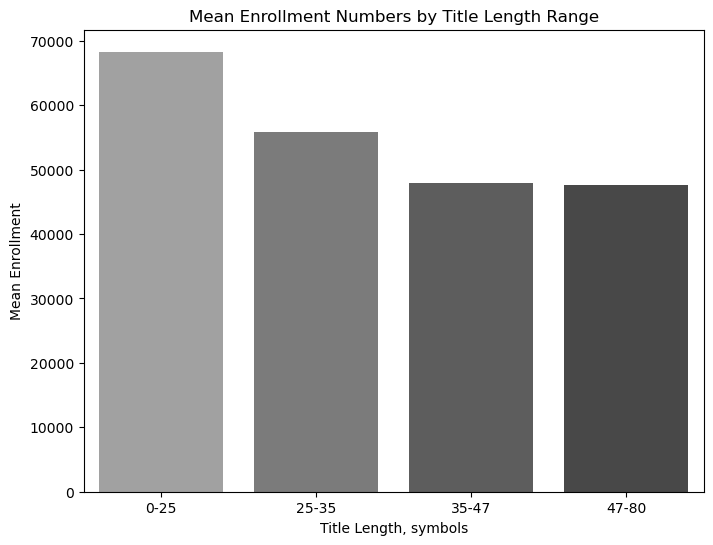

In [22]:
# Filter the DataFrame to exclude enrollment values higher than 222 500
filtered_df = df[df['new_students_enrolled'] <= 222500].copy()

filtered_df['title_length_range'] = pd.cut(filtered_df['title_length'], bins=[0, 25, 35, 47, 80], labels=['0-25', '25-35', '35-47', '47-80'])

# Calculate the mean enrollment numbers for each range
mean_enrollment = filtered_df.groupby('title_length_range')['new_students_enrolled'].mean().reset_index()

# Create a bar plot of the mean enrollment numbers
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_enrollment, x='title_length_range', y='new_students_enrolled', palette='Greys_d')
plt.xlabel('Title Length, symbols')
plt.ylabel('Mean Enrollment')
plt.title('Mean Enrollment Numbers by Title Length Range')
plt.xticks(rotation=0)
plt.show()

<b> Conclucion. <br> </b>
1. No significant linear correlation has been observed between title length and student enrollment numbers.
2. It can be concluded that lower character counts in the course titles translate into higher mean enrollment numbers. Suggestion for further courses - have as few characters as possible.

## Productivity analysis.
This part is designated directly to Educational Team. Findings will be presented in the visualized format and conclusions given.

<center> 1. What are the best/ worst courses by course rating and enrollment numbers? How actually bad they are in terms of median numbers?

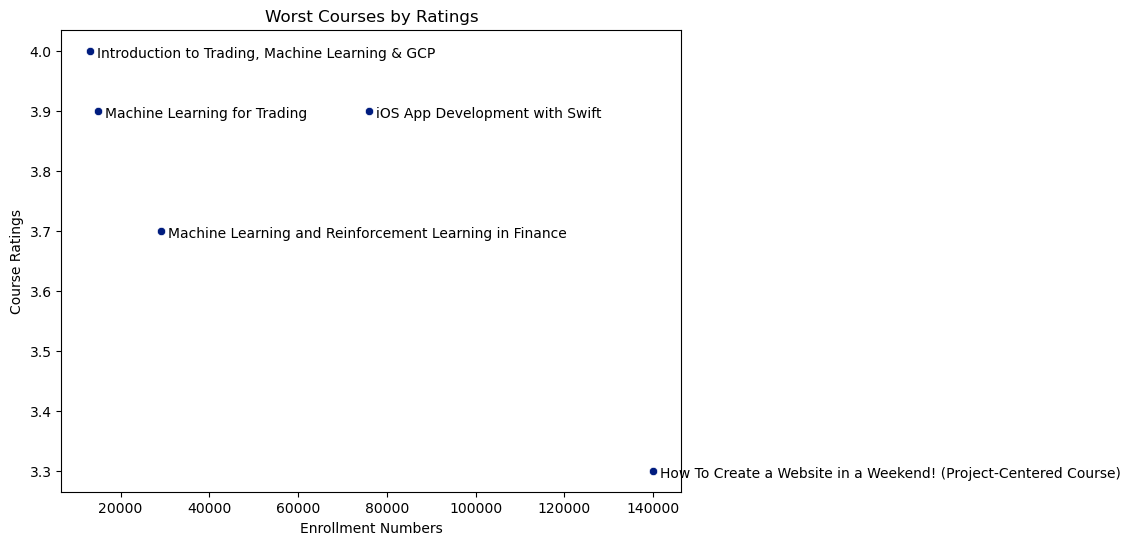

In [23]:
# Sort the dataframe by course rating in ascending order
worst_courses_df = df.sort_values(by='course_rating').head(5)

# Create a scatter plot of enrollment numbers vs course ratings using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=worst_courses_df, x='new_students_enrolled', y='course_rating')

# Add value labels to the scatter plot for each course title
for i, title in enumerate(worst_courses_df['course_title']):
    plt.annotate(title, (worst_courses_df['new_students_enrolled'].iloc[i], worst_courses_df['course_rating'].iloc[i]),
                 xytext=(5, -5), textcoords='offset points')

# Set the x and y axis labels
plt.xlabel('Enrollment Numbers')
plt.ylabel('Course Ratings')

# Set the plot title
plt.title('Worst Courses by Ratings')

# Display the plot
plt.show()

In [24]:
df['course_rating'].median()

4.7

<b>Conclusion</b>: The mentioned above courses should be additionally inspected why they degrade overall ratings. Worst rated course "How to Create a Website in a Weekend"! is almost 30 % lower than median course rating.

<center> 2. What are the worst course certificates by course rating and enrollment numbers? How actually bad they are in terms of median numbers?

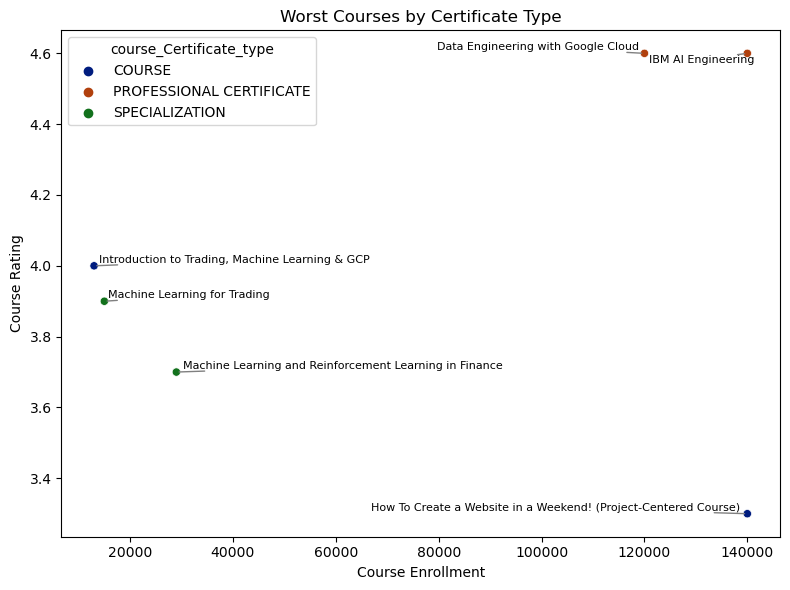

In [25]:
from adjustText import adjust_text

# Filter the dataframe for the desired certificate types
worst_courses = df[df['course_Certificate_type'].str.upper().isin(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'])]

# Get the 3 worst courses for each specialization
worst_courses = worst_courses.groupby('course_Certificate_type').apply(lambda x: x.nsmallest(2, 'course_rating')).reset_index(drop=True)

# Create a scatter plot with hue based on certificate type
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(data=worst_courses, x='new_students_enrolled', y='course_rating', hue='course_Certificate_type')

# Set the x and y axis labels
plt.xlabel('Course Enrollment')
plt.ylabel('Course Rating')

# Set the plot title
plt.title('Worst Courses by Certificate Type')

# Add value labels to the points
labels = []
for line in range(0, worst_courses.shape[0]):
    x = worst_courses['new_students_enrolled'].iloc[line]
    y = worst_courses['course_rating'].iloc[line]
    label = worst_courses['course_title'].iloc[line]
    labels.append(plt.text(x, y, str(label), ha='left', va='bottom', fontsize=8, color='black'))

# Adjust the position of the labels to minimize overlap
adjust_text(labels, arrowprops=dict(arrowstyle='-', color='gray'))
plt.tight_layout()

# Display the plot
plt.show()


<b>Conclusion</b>: According to course ratings these are worst certificate types you can get in Coursera Platform.

## Partnership analysis.
This part is designated directly to Partnerships Development Team.
Findings will be presented in the visualized format and conclusions given.

<center> 1. What are TOP 10 organizations offering courses on Coursera platform, by courses offered?

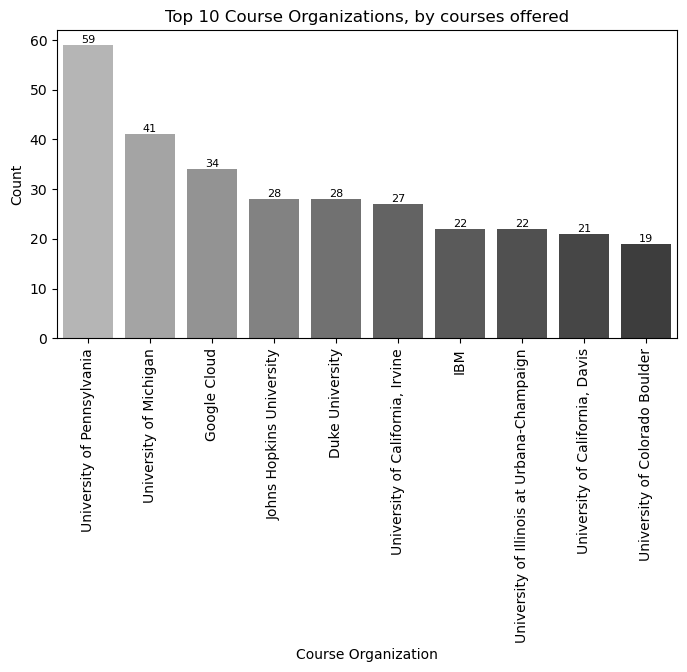

In [26]:
# Plot the value counts of 'course_organization'
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df['course_organization'].value_counts().head(10).index,
                 y=df['course_organization'].value_counts().head(10), palette = 'Greys_d')

plt.xlabel('Course Organization')
plt.ylabel('Count')
plt.title('Top 10 Course Organizations, by courses offered')
plt.xticks(rotation=90)

# Add value labels to the bars
for i, count in enumerate(df['course_organization'].value_counts().head(10)):
    ax.text(i, count, f'{count}', ha='center', va='bottom', fontsize=8)

plt.show()

<b>Conclusion</b>: Unniversity of Pennsylvania, University of Michigan, Google Cloud has the most courses to offer. <br>
<b> FACT</b>: TOP 3 institutions account for 15 % of all courses available.

2. What 5 organizations (that have at least <b> 10 courses on our platform</b>) provide best results in terms of mean ratings, mean enrollment?

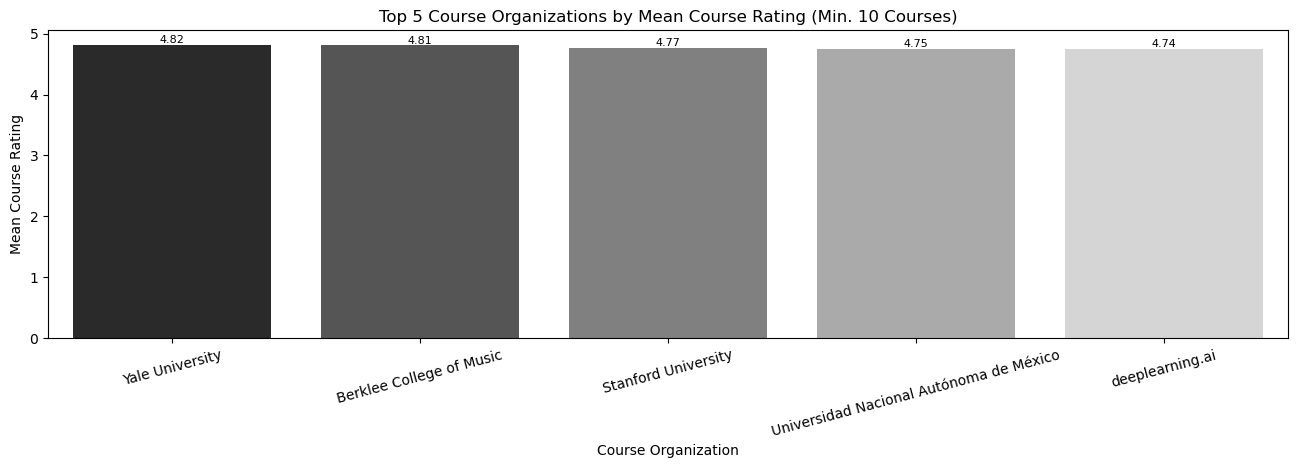

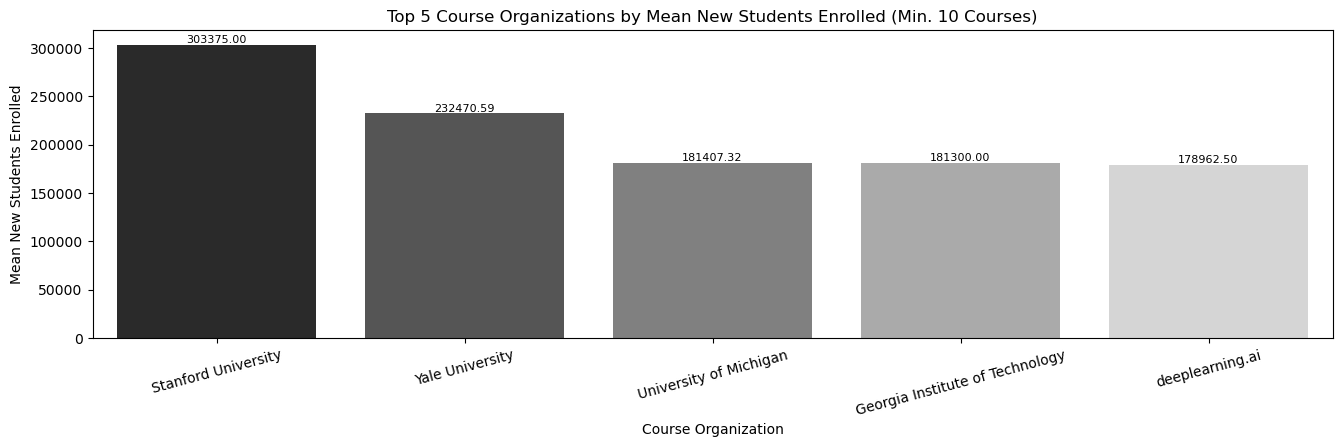

In [27]:
def plot_top_organizations(data, column, min_courses=10, top_n=5):
    # Filter the course organizations with at least min_courses
    organizations_with_min_courses = data['course_organization'].value_counts()[data['course_organization'].value_counts() >= min_courses].index

    # Calculate the mean values for the filtered organizations
    mean_values = data[data['course_organization'].isin(organizations_with_min_courses)].groupby('course_organization')[column].mean().sort_values(ascending=False).head(top_n)

    # Plot the mean values for the top organizations
    plt.figure(figsize=(16, 4))
    sns.barplot(x=mean_values.index, y=mean_values, palette='gray')

    plt.xlabel('Course Organization')
    plt.ylabel(f'Mean {column.replace("_", " ").title()}')
    plt.title(f'Top {top_n} Course Organizations by Mean {column.replace("_", " ").title()} (Min. {min_courses} Courses)')

    plt.xticks(rotation=15)

    # Add value labels to the bars
    for i, value in enumerate(mean_values):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

    plt.show()

# Call the function with 'course_rating' column
plot_top_organizations(df, 'course_rating')

# Call the function with 'new_students_enrolled' column
plot_top_organizations(df, 'new_students_enrolled')


<b>Conclusion: </b> course organizations that have minimum 10 courses in Coursera:</b>: 
1. By Mean Course ratings: Yale, Berklee College of Music, Stanford University, deeplearning.ai
2. By Mean Enrollment rate: Stanford University, Yale University, University of Michigan, Georgia Institute of Tech, deeplearning.ai.

<b>FACT: </b>: Yale University, Stanford University and deeplearning.ai are among TOP 5 in terms of all available course rankings.

## Education analysis.
This part is designated directly to the Content Development Team.
Findings will be presented in the visualized format and conclusions given.

1. What percentage of our courses are of which difficulty? <br>
2. What percentage of our courses are of which certificate type?

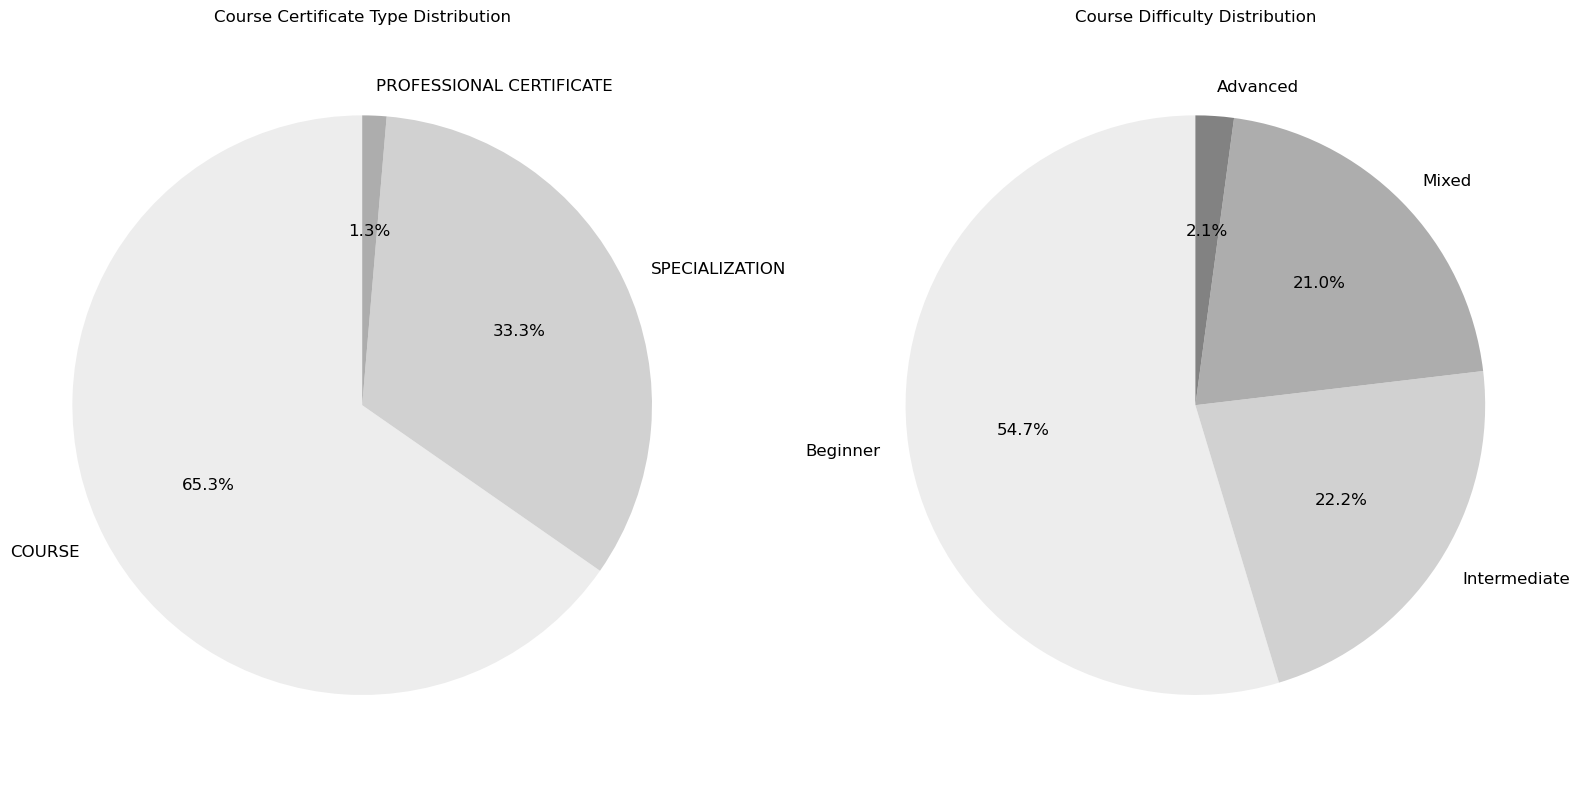

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of courses for each certificate type
certificate_counts = df['course_Certificate_type'].value_counts()

# Count the number of courses for each difficulty level
difficulty_counts = df['course_difficulty'].value_counts()

# Set the color palette to grayscale
sns.set_palette("Greys")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for certificate type
certificate_plot = axes[0].pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', startangle=90,
                              textprops={'fontsize': 12})
axes[0].set_title('Course Certificate Type Distribution')
axes[0].axis('equal')

# Set label color to black for better visibility
for label in certificate_plot[1]:
    label.set_color('black')

# Plot the pie chart for difficulty
difficulty_plot = axes[1].pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=90,
                             textprops={'fontsize': 12})
axes[1].set_title('Course Difficulty Distribution')
axes[1].axis('equal')

# Set label color to black for better visibility
for label in difficulty_plot[1]:
    label.set_color('black')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<b>Conclusion: </b> There are most course certificates as 'Course' and more than half of our courses are Beginner level.

3. What is the mean enrollment/ ratings of 3 different certificates? <br>
4. What is the mean enrollment/ ratings of 3 different difficulties?

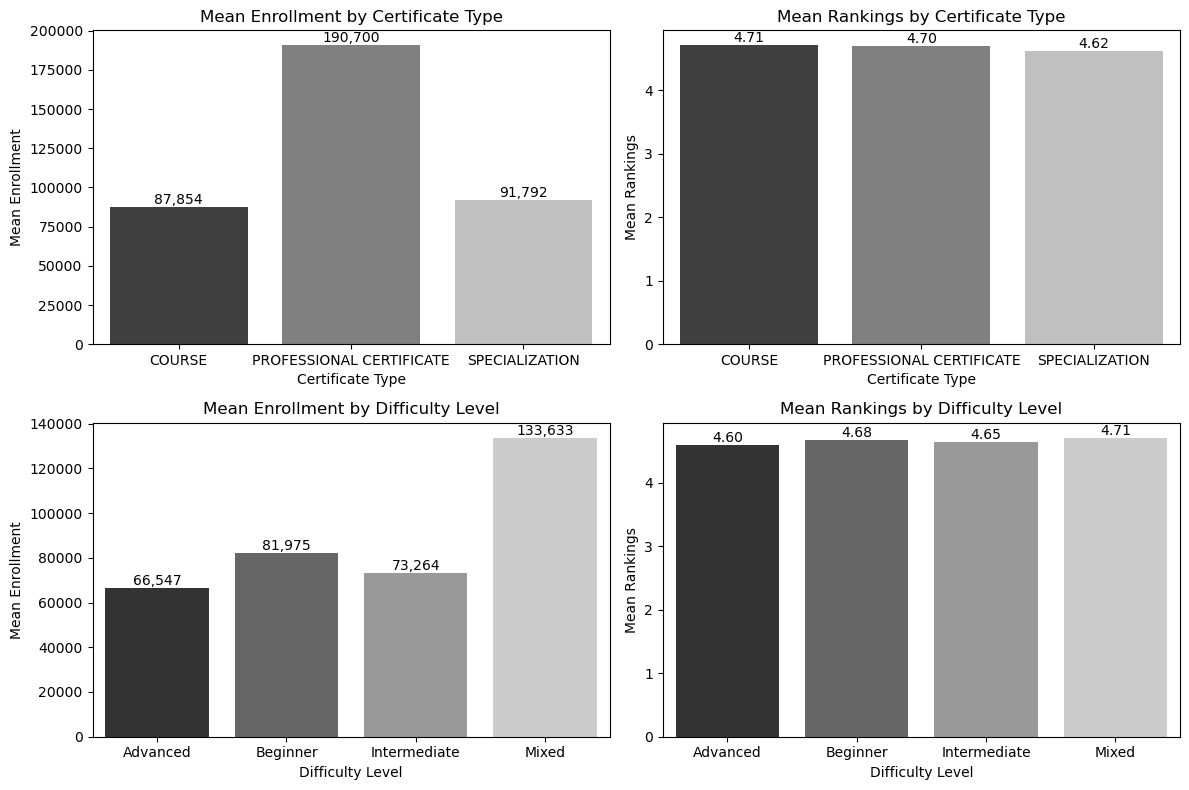

In [29]:
# Calculate the mean enrollment for each certificate type
mean_enrollment_cert = df.groupby('course_Certificate_type')['new_students_enrolled'].mean()

# Calculate the mean rankings for each certificate type
mean_rankings_cert = df.groupby('course_Certificate_type')['course_rating'].mean()

# Calculate the mean enrollment for each difficulty level
mean_enrollment_difficulty = df.groupby('course_difficulty')['new_students_enrolled'].mean()

# Calculate the mean rankings for each difficulty level
mean_rankings_difficulty = df.groupby('course_difficulty')['course_rating'].mean()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot mean enrollment by certificate type
sns.barplot(ax=axes[0, 0], x=mean_enrollment_cert.index, y=mean_enrollment_cert, palette='gray')
axes[0, 0].set_xlabel('Certificate Type')
axes[0, 0].set_ylabel('Mean Enrollment')
axes[0, 0].set_title('Mean Enrollment by Certificate Type')

# Add value labels to mean enrollment plot
for i, enrollment in enumerate(mean_enrollment_cert):
    axes[0, 0].text(i, enrollment, f'{enrollment:,.0f}', ha='center', va='bottom')

# Plot mean rankings by certificate type
sns.barplot(ax=axes[0, 1], x=mean_rankings_cert.index, y=mean_rankings_cert, palette='gray')
axes[0, 1].set_xlabel('Certificate Type')
axes[0, 1].set_ylabel('Mean Rankings')
axes[0, 1].set_title('Mean Rankings by Certificate Type')

# Add value labels to mean rankings plot
for i, ranking in enumerate(mean_rankings_cert):
    axes[0, 1].text(i, ranking, f'{ranking:.2f}', ha='center', va='bottom')

# Plot mean enrollment by difficulty
sns.barplot(ax=axes[1, 0], x=mean_enrollment_difficulty.index, y=mean_enrollment_difficulty, palette='gray')
axes[1, 0].set_xlabel('Difficulty Level')
axes[1, 0].set_ylabel('Mean Enrollment')
axes[1, 0].set_title('Mean Enrollment by Difficulty Level')

# Add value labels to mean enrollment plot
for i, enrollment in enumerate(mean_enrollment_difficulty):
    axes[1, 0].text(i, enrollment, f'{enrollment:,.0f}', ha='center', va='bottom')

# Plot mean rankings by difficulty
sns.barplot(ax=axes[1, 1], x=mean_rankings_difficulty.index, y=mean_rankings_difficulty, palette='gray')
axes[1, 1].set_xlabel('Difficulty Level')
axes[1, 1].set_ylabel('Mean Rankings')
axes[1, 1].set_title('Mean Rankings by Difficulty Level')

# Add value labels to mean rankings plot
for i, ranking in enumerate(mean_rankings_difficulty):
    axes[1, 1].text(i, ranking, f'{ranking:.2f}', ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<b>Conclusion: </b> Highest mean enrollment rates are observed at Professional Certificate and Mixed level courses. By the time, highest Mean Rankings were observed at Course certificates and also Mixed levels.

# Areas for improvement.

> <b> 1. </b>Whenever possible I would use Pandas Profilling or Sweetwiz packages for EDA.  <br>
> <b> 2. </b>Personally I do not like Jupyter Notebooks for project presentation (not very interactive), I would prefer to present on MS Powerpoint or creating Dashboard. <br>

In [30]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='DF Pandas Profiling Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# General Conclusions.
* There is high variability of data in course enrollment numbers. While some are very popular (3.2 million) other only have 1.5 k students.<br>
* University of Pennsylvania has the most courses to offer in our platform.<br>
* Begginer level courses and certificates of a 'course' are the most popular.<br>
* Half of course ratings fall between 4.6 and 4.8 (great overall quality).<br>
* 75% of courses have less than 100 k students enrolled.<br>
* We must further develop courses around keywords like 'Introduction', 'Data', 'Management', 'Python'.<br>
* Courses with the most enrollment have words of 'Science', 'Python'. These are our most succesfull courses.<br>
* Courses titles that have 0-25 characters have better mean enrollment numbers.<br>
* Course 'How to Create a Website in a Weekend!' is 30% worse that our median course (in ratings).<br>
* Yale university, Stanford and deeplearning.ai have best rated and attended courses in the platform.<br>
* Highest mean enrollment rates are observed at proffesional certificate and mixed level courses. Mean rankings at 'Course' certificates and Mixed levels.
* 24 different plots were plotted in the report.

# Thank you for your attention!